In [50]:
import mlflow
import os
import pandas as pd

In [51]:
dataset_name="jackson"
pred_target="ERStatus"
experiment_name = f"san_{dataset_name}_{pred_target}"
mlflow.set_tracking_uri("file:///Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/mlruns/")

In [52]:
# Collect attribute configs names
attribute_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/attribute_configs"
attribute_configs = os.listdir(attribute_configs_path)
attribute_configs = [os.path.splitext(config)[0] for config in attribute_configs if config.endswith(".yaml")]

# Collect concept configs names
concept_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/concept_configs"
concept_configs = os.listdir(concept_configs_path)
concept_configs = [os.path.splitext(config)[0] for config in concept_configs if config.endswith(".yaml")]

# Collect pretrain configs
pretrain_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/pretrain_model_configs"
pretrain_configs = os.listdir(pretrain_configs_path)

In [157]:
# Define inputs
concept = "concept_1_radius"
attribute_config = "all_X_cols"
randomize = "False"
split_strategy = "split_basel_leave_zurich_as_external"
run_type = "pretrain_concept"
metric = "metrics.best_val_balanced_accuracy"

# Define query for MLFlow
query = f"""\
    params.concept = "{concept}" and \
    params.run_type = "{run_type}" and \
    params.split_strategy = "{split_strategy}" and \
    params.attribute_config = "{attribute_config}" and \
    params.randomize = "{randomize}"
    """

# Query
df = mlflow.search_runs(
        experiment_names=[experiment_name],
        filter_string=query
)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.val_weighted_f1_score,metrics.train_weighted_recall,metrics.val_balanced_accuracy,metrics.best_val_balanced_accuracy_epoch,...,params.normalized_with,params.jk,params.n_epoch,params.randomize,params.concept,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.name
0,24551ccc46974bbb86e67a0e3ff24614,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:20:28.417000+00:00,2023-11-30 10:23:43.324000+00:00,0.732750,0.727969,0.661975,10.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
1,21d49d8c423340c18174ff0d09de7385,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:18:57.249000+00:00,2023-11-30 10:23:59.886000+00:00,0.661750,0.708812,0.686975,10.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
2,bb28a09c07c54ddf9c366a5e0a8c625b,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:18:10.392000+00:00,2023-11-30 10:23:38.501000+00:00,0.720020,0.808429,0.662185,8.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
3,9a36f5ddf0a449eaae03942156d10b40,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:15:32.898000+00:00,2023-11-30 10:20:36.933000+00:00,0.673837,0.739464,0.584874,8.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
4,31bb4118c8164f5e8d3b370a370d23d9,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:14:21.942000+00:00,2023-11-30 10:21:58.065000+00:00,0.727521,0.785441,0.668067,10.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
5,0b87690e3d9141998b92f6402fd3ab28,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:12:07.435000+00:00,2023-11-30 10:17:49.675000+00:00,0.723972,0.804598,0.626050,2.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
6,c92e7951d27c4a978dbcd4cfde96fcbd,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:11:50.608000+00:00,2023-11-30 10:20:11.349000+00:00,0.637544,0.762452,0.555462,1.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
7,1ad6fcfd804e4f76939d77acd6e9beaa,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:08:35.551000+00:00,2023-11-30 10:17:01.371000+00:00,0.681416,0.804598,0.572689,9.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
8,b2e437b3f19b4975ad395bf51cdd7770,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:08:35.229000+00:00,2023-11-30 10:14:03.333000+00:00,0.767333,0.789272,0.661345,3.0,...,normalized_with_min_max,None,10,False,concept_1_radius,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,santiago,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
9,775fc4117a19453fb92192a0e0237fe5,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:08:34.937000+00:00,2023-11-30 10:14:01.097000+00:00,0.74

In [158]:
# Group by these (they re the model parameters, importantly excluding seed and folds)
params = [
    'optim',
    'norm',
    'num_layers',
    'n_epoch',
    'gnn',
    'dropout',
    'scaler', 
    'lr',
    'act',
    'scheduler',
    'num_layers_MLP',
    'in_channels',
    'hidden_channels',
    'pool',
    'jk',
    'batch_size',
    'act_first',
    'path_input_config', # Should be one per distribution or group
    'path_input_data' # Should be one for all runs with the same concept
]
params = [f"params.{param}" for param in params]

In [159]:
df.groupby("params.cfg_id")[metric].describe()

,count,mean,std,min,25%,50%,75%,max
params.cfg_id,,,,,,,,
1dc1adf7-95d0-4989-8c20-d5856191ddc7,6.0,0.641842,0.050372,0.591597,0.595956,0.638550,0.682248,0.703782
f56f7691-8d14-4afd-8d47-0c3776dd893f,6.0,0.659384,0.034790,0.620168,0.641597,0.655882,0.662763,0.722479


In [100]:
# Get path to the dataset and config
median_metrics = df.groupby(params)[metric].median().reset_index()

# Get group with the best median
best_params = median_metrics.loc[median_metrics[metric].idxmax()]
median = best_params[metric]

# Use the values from the Series to create a DataFrame for merging
best_params_df = pd.DataFrame([best_params.values], columns=best_params.index)

# Merge with the original DataFrame to locate all runs with the best parameters
best_runs = pd.merge(df, best_params_df, on=params, how='inner', suffixes=(None, "_from_grouped"))
print(
    best_runs["params.path_input_data"].unique()[0] # Should be one unique value
)
print(
    best_runs["params.path_input_config"].unique()[0] # Should be one unique value
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/processed_data/attributed/all_X_cols/concept_1_radius
/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/pretrain_model_configs/f56f7691-8d14-4afd-8d47-0c3776dd893f.yaml


In [109]:
# Pick the the group with the highest median and save its config and the checkpoint closes to the median
print(
    best_runs.loc[(best_runs[metric] - median).abs().idxmin(), "params.path_output_models"]
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/checkpoints/all_X_cols/concept_1_radius/f56f7691-8d14-4afd-8d47-0c3776dd893f/fold_1/seed_1


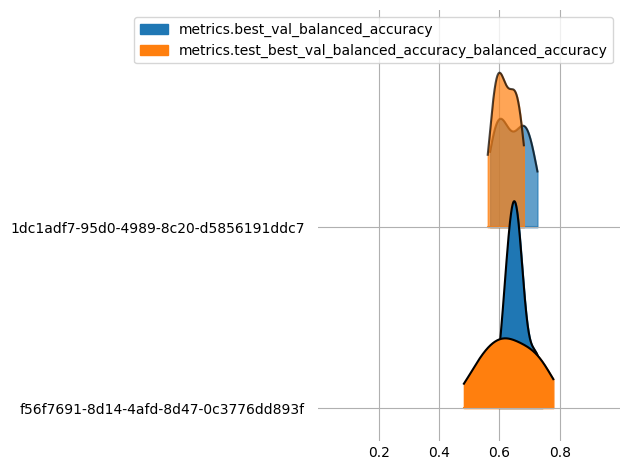

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np; np.random.seed(2)
import random; random.seed(2)
import joypy

smaller_df = df[[
    "metrics.best_val_balanced_accuracy", 
    "metrics.test_best_val_balanced_accuracy_balanced_accuracy",
    "params.cfg_id"
    ]]
data_range = (0, 1)
fig, ax = joypy.joyplot(
    smaller_df, 
    fade=True,
    by = "params.cfg_id",
    legend = True,
    grid = True,
    range_style='own',  # Set range_style to 'own' to use your own data range
    ylabels=True,  # Adjust as needed
    x_range=data_range,  # Set the desired x-axis limits
    )

plt.show() 


In [108]:
# TODO: save histogram of models groups to output

# TODO: save tuple of run_ids so that the losses can be visualize in mlflow

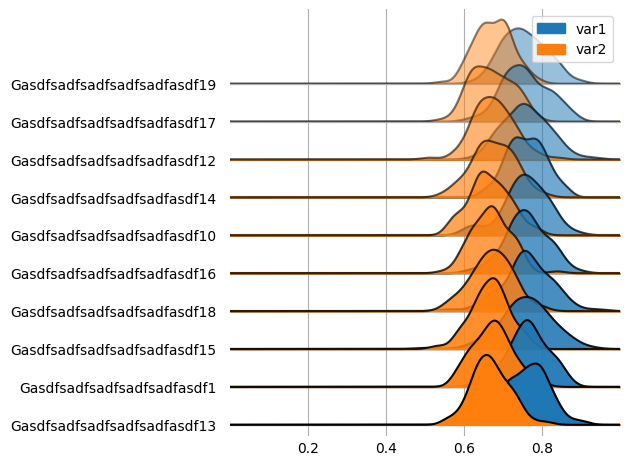

In [155]:
import numpy as np
import pandas as pd
import random
import joypy

# Your existing DataFrame creation code
df = pd.DataFrame({'var1': np.random.normal(0.76, 0.06, 1000),
                   'var2': np.random.normal(0.67, 0.05, 1000),
                   'group': random.choices([
                       "Gasdfsadfsadfsadfsadfasdf1",
                       "Gasdfsadfsadfsadfsadfasdf12", 
                       "Gasdfsadfsadfsadfsadfasdf13", 
                       "Gasdfsadfsadfsadfsadfasdf14", 
                       "Gasdfsadfsadfsadfsadfasdf15",
                       "Gasdfsadfsadfsadfsadfasdf16",
                       "Gasdfsadfsadfsadfsadfasdf17",
                       "Gasdfsadfsadfsadfsadfasdf18",
                       "Gasdfsadfsadfsadfsadfasdf19",
                       "Gasdfsadfsadfsadfsadfasdf10"
                       ], k=1000)})

# Calculate median for each group
median_values = df.groupby('group')['var1'].median().sort_values().index

# Reorder the DataFrame based on the sorted groups
df['group'] = pd.Categorical(df['group'], categories=median_values, ordered=True)
df = df.sort_values('group')

# Plotting the joyplot
fig, ax = joypy.joyplot(
    df, 
    by="group", 
    legend=True,
    x_range=data_range,
    grid=True,
    fade=True
)
